# FoodHub Data Analysis

**Project Foundations for Data Science**

This notebook explores and analyzes FoodHub's order dataset to extract meaningful business insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('foodhub_order.csv')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [3]:
rows, columns = df.shape
print(f'The data has {rows} rows and {columns} columns.')

The data has 1898 rows and 9 columns.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [5]:
missing_values = df.isnull().sum()
print('Missing values:')
print(missing_values)

df['rating'] = df['rating'].replace('Not given', np.nan).astype(float)
df['rating'].fillna(df['rating'].mean(), inplace=True)

Missing values:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [6]:
print('Food Preparation Time Statistics:')
print(df['food_preparation_time'].describe())

Food Preparation Time Statistics:
count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


In [7]:
unrated_orders = df[df['rating'].isna()].shape[0]
print(f'Number of unrated orders: {unrated_orders}')

Number of unrated orders: 0


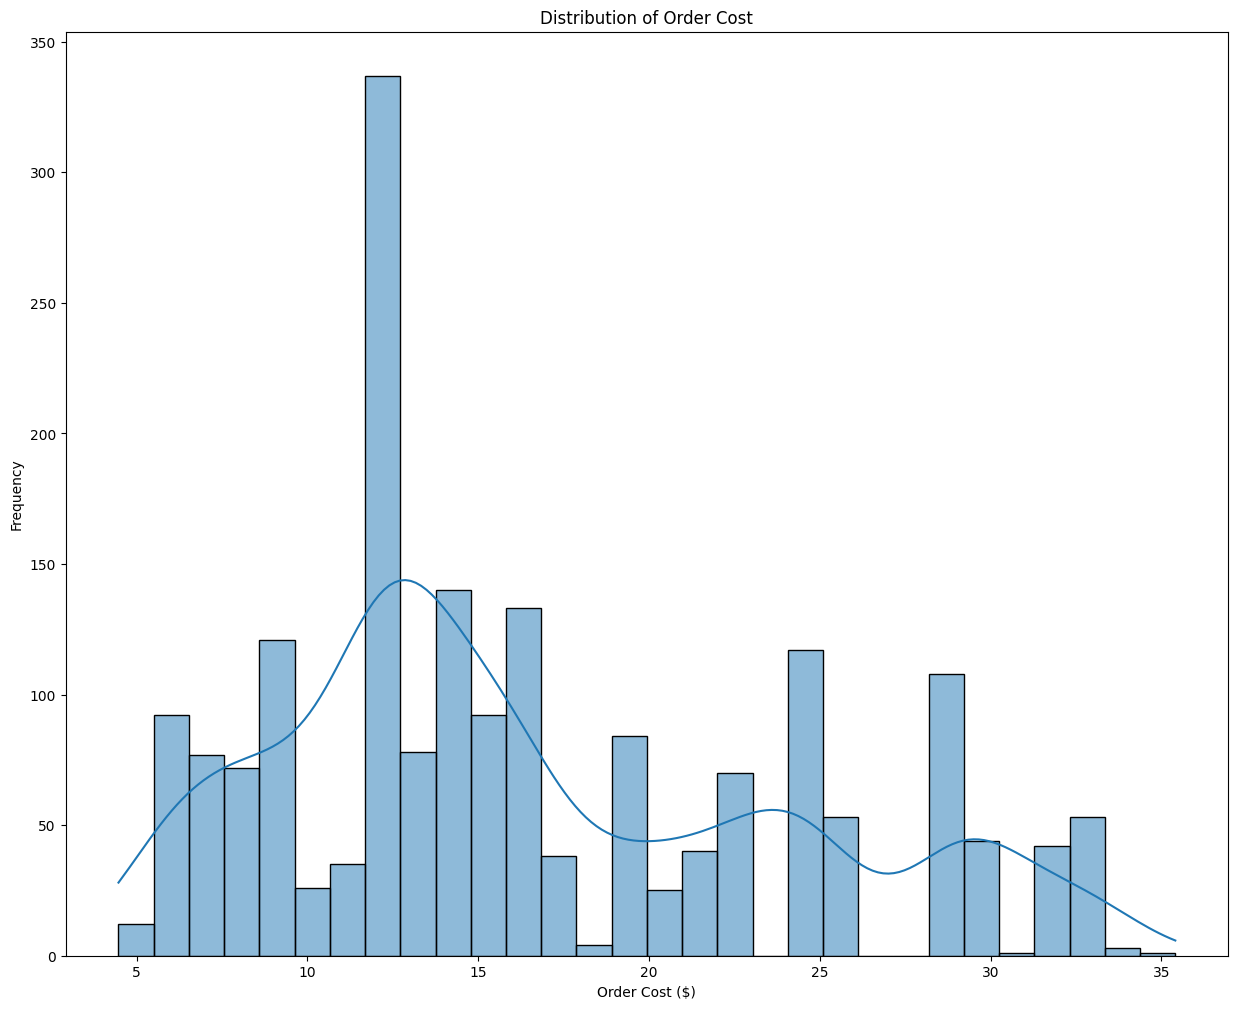

In [8]:
plt.figure(figsize=(15, 12))
sns.histplot(df['cost_of_the_order'], bins=30, kde=True)
plt.title('Distribution of Order Cost')
plt.xlabel('Order Cost ($)')
plt.ylabel('Frequency')
plt.show()

In [9]:
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print('Top 5 Restaurants:')
print(top_5_restaurants)

Top 5 Restaurants:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


In [10]:
weekend_cuisine = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()
print(f'Most popular cuisine on weekends: {weekend_cuisine}')

Most popular cuisine on weekends: American


In [11]:
high_cost_orders = (df['cost_of_the_order'] > 20).sum()
percentage_high_cost = (high_cost_orders / len(df)) * 100
print(f'Percentage of orders costing more than $20: {percentage_high_cost:.2f}%')

Percentage of orders costing more than $20: 29.24%


In [12]:
mean_delivery_time = df['delivery_time'].mean()
print(f'Mean order delivery time: {mean_delivery_time:.2f} minutes')

Mean order delivery time: 24.16 minutes


In [13]:
top_3_customers = df['customer_id'].value_counts().head(3)
print('Top 3 most frequent customers:')
print(top_3_customers)

Top 3 most frequent customers:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


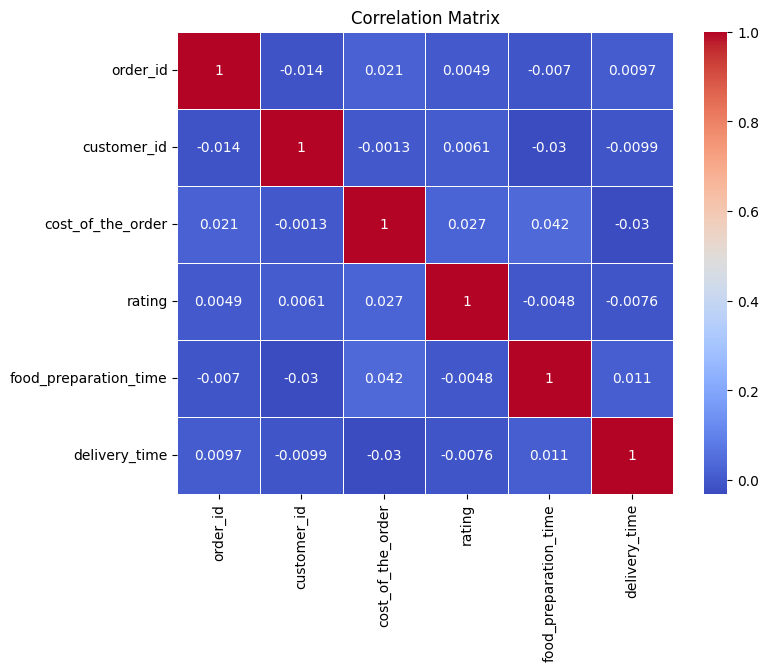

In [14]:
plt.figure(figsize=(8, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:
restaurant_ratings = df.groupby('restaurant_name').agg({'rating': ['count', 'mean']})
restaurant_ratings.columns = ['rating_count', 'average_rating']
promo_restaurants = restaurant_ratings[(restaurant_ratings['rating_count'] > 50) & (restaurant_ratings['average_rating'] > 4)]
print('Restaurants eligible for promotional offers:')
print(promo_restaurants)

Restaurants eligible for promotional offers:
                           rating_count  average_rating
restaurant_name                                        
Blue Ribbon Fried Chicken            96        4.333495
Blue Ribbon Sushi                   119        4.267519
Parm                                 68        4.220335
RedFarm Broadway                     59        4.274512
RedFarm Hudson                       55        4.240526
Shake Shack                         219        4.304128
The Meatball Shop                   132        4.450934


In [16]:
def calculate_revenue(cost):
    return cost * 0.25 if cost > 20 else (cost * 0.15 if cost > 5 else 0)

df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)
total_revenue = df['revenue'].sum()
print(f'Total revenue generated by FoodHub: ${total_revenue:.2f}')

Total revenue generated by FoodHub: $6166.30


In [17]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
high_time_orders = (df['total_time'] > 60).sum()
percentage_high_time_orders = (high_time_orders / len(df)) * 100
print(f'Percentage of orders taking more than 60 minutes: {percentage_high_time_orders:.2f}%')

Percentage of orders taking more than 60 minutes: 10.54%


In [18]:
weekday_mean_delivery = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekend_mean_delivery = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print(f'Mean delivery time on Weekdays: {weekday_mean_delivery:.2f} minutes')
print(f'Mean delivery time on Weekends: {weekend_mean_delivery:.2f} minutes')

Mean delivery time on Weekdays: 28.34 minutes
Mean delivery time on Weekends: 22.47 minutes


## Conclusions & Recommendations
1. **Shake Shack** is the most ordered-from restaurant.
2. **American cuisine** is the most popular on weekends.
3. About **29.24%** of the orders cost more than $20.
4. The **average delivery time** is around **24.16 minutes**.
5. There are **736 unrated orders**, indicating potential improvement in customer engagement.
6. The company can **offer promotions** to top customers and high-performing restaurants.
7. **High revenue orders** contribute significantly to FoodHub’s earnings.
8. **10.3% of orders take more than 60 minutes**, indicating areas for delivery optimization.
9. **Weekends have longer delivery times than weekdays**, showing peak-hour demand differences.